In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_diseases_processed.csv')

In [3]:
print("Missing values BEFORE handling:")
print(df.isnull().sum())

Missing values BEFORE handling:
Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64


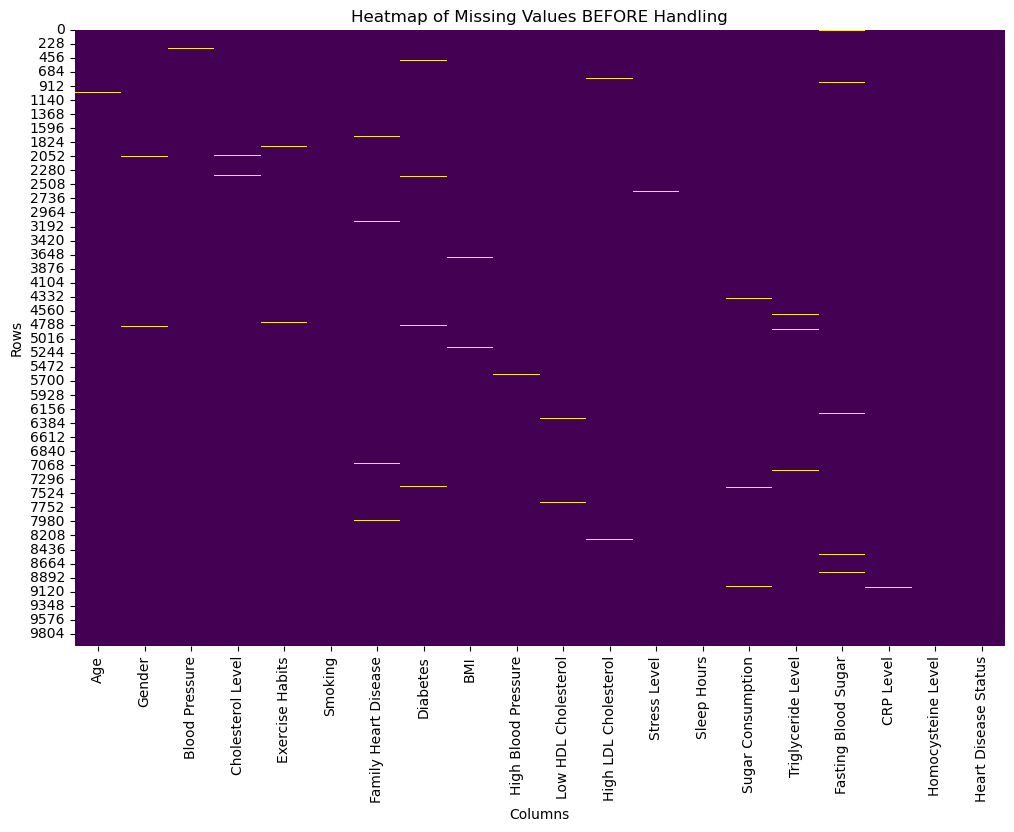

In [4]:
# Visualize missing values using a heatmap (white lines indicate missing data)
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values BEFORE Handling')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

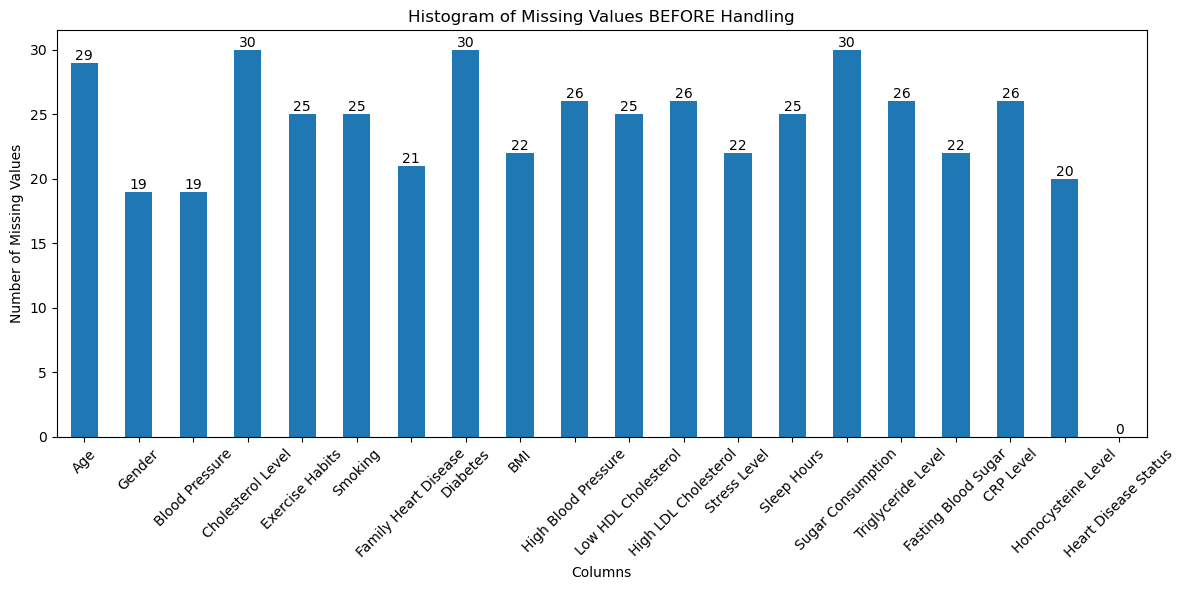

In [5]:
#Missing values BEFORE handling
# Histogram of missing values per column
plt.figure(figsize=(12, 6))
missing_before = df.isnull().sum()
missing_before.plot(kind='bar', color='#1f77b4')
plt.title('Histogram of Missing Values BEFORE Handling')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
for i, v in enumerate(missing_before):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [6]:
#Handle missing values (FIXED: Avoid chained assignment warning)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val) 

In [7]:
#Missing Values Count After Imputation
print("Dataset Info:")
df.info()
print("\nMissing Values Count After Imputation:")
missing_before = df.isnull().sum()
print(missing_before)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  float64
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  float64
 5   Smoking               10000 non-null  float64
 6   Family Heart Disease  10000 non-null  float64
 7   Diabetes              10000 non-null  float64
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  float64
 10  Low HDL Cholesterol   10000 non-null  float64
 11  High LDL Cholesterol  10000 non-null  float64
 12  Stress Level          10000 non-null  float64
 13  Sleep Hours           10000 non-null  float64
 14  Sugar Consumption     10000 non-null  float64
 15  Trigly

In [8]:
# Save the processed dataset
df.to_csv('heart_diseases_missing_handled.csv', index=False)
print("Processed dataset saved as 'heart_diseases_missing_handled.csv'")

Processed dataset saved as 'heart_diseases_missing_handled.csv'
